# Proyecto ML Kaggle competition

In [3]:
import pandas as pd
import numpy as np

In [4]:
#%pip install xarray

In [5]:
#%pip install pip==21.3.1
#%pip install netCDF4

In [6]:
from netCDF4 import Dataset
def load_data(filename):
    data=Dataset(filename)
    return data

In [7]:
predictors = ['apcp_sfc','dlwrf_sfc','dswrf_sfc','pres_msl','pwat_eatm',\
                  'spfh_2m','tcdc_eatm','tcolc_eatm','tmax_2m','tmin_2m',\
                  'tmp_2m','tmp_sfc','ulwrf_sfc','ulwrf_tatm','uswrf_sfc']
train_end = '_latlon_subset_19940101_20071231.nc'
path='data/train/'
#

In [8]:
import os
apcp_sfc=load_data(os.path.join(path,predictors[0]+train_end))
dlwrf_sfc=load_data(os.path.join(path,predictors[1]+train_end))
dswrf_sfc=load_data(os.path.join(path,predictors[2]+train_end))
pres_msl=load_data(os.path.join(path,predictors[3]+train_end))
pwat_eatm=load_data(os.path.join(path,predictors[4]+train_end))
spfh_2m=load_data(os.path.join(path,predictors[5]+train_end))
tcdc_eatm=load_data(os.path.join(path,predictors[6]+train_end))
tcolc_eatm=load_data(os.path.join(path,predictors[7]+train_end))
tmax_2m=load_data(os.path.join(path,predictors[8]+train_end))
tmin_2m=load_data(os.path.join(path,predictors[9]+train_end))
tmp_2m=load_data(os.path.join(path,predictors[10]+train_end))
tmp_sfc=load_data(os.path.join(path,predictors[11]+train_end))
ulwrf_sfc=load_data(os.path.join(path,predictors[12]+train_end))
ulwrf_tatm=load_data(os.path.join(path,predictors[13]+train_end))
uswrf_sfc=load_data(os.path.join(path,predictors[14]+train_end))

In [9]:
apcp_sfc.variables.keys()

dict_keys(['time', 'intTime', 'lat', 'lon', 'ens', 'fhour', 'intValidTime', 'Total_precipitation'])

In [10]:
precip = apcp_sfc.variables['Total_precipitation']
print(precip)

<class 'netCDF4._netCDF4.Variable'>
float32 Total_precipitation(time, ens, fhour, lat, lon)
    _FillValue: 9999.0
    units: kg m-2
    long_name: Total_precipitation_Accumulation (Accumulation for  Mixed Intervals) @ surface
    cell_methods: time: sum
    GRIB_param_discipline: Meteorological_products
    GRIB_param_category: Moisture
    GRIB_param_name: Total_precipitation
    GRIB_generating_process_type: Forecast
    GRIB_param_id: [2 0 1 8]
    GRIB_product_definition_template: 8
    GRIB_product_definition_template_desc: Average, accumulation, extreme values or other statistically processed value at a horizontal level in a time interval
    GRIB_level_type: 1
    GRIB_level_type_name: surface
    GRIB_interval_stat_type: Accumulation
    GRIB_VectorComponentFlag: easterlyNortherlyRelative
unlimited dimensions: 
current shape = (5113, 11, 5, 9, 16)
filling on


In [11]:
apcp_sfc.variables.keys()

dict_keys(['time', 'intTime', 'lat', 'lon', 'ens', 'fhour', 'intValidTime', 'Total_precipitation'])

In [12]:
#%pip install importlib-metadata==4.13.0 AÑADIR AL REQUIRES

In [13]:
#Funcion que convierte a dataframe los netCDF4
import os
from matplotlib import pyplot as plt
import pandas as pd
import netCDF4
import numpy as np
import xarray as xr

def net_df(num,key):
    os.chdir(r'C:\Users\MEMORY SISTEMAS\Desktop\Bootcamp\thebridge_ft_sep22 - PB\3-Machine Learning\2-Supervisado\11- Entregables')
    dp = xr.open_dataset(os.path.join(path,predictors[num]+train_end))
    dp[key]
    m2 = dp.to_dataframe()
    s = pd.DataFrame(m2)
    return(s)


In [14]:
print(uswrf_sfc.variables.keys())


dict_keys(['time', 'intTime', 'lat', 'lon', 'ens', 'fhour', 'intValidTime', 'Upward_Short-Wave_Rad_Flux'])


In [15]:
apcp_sfc = net_df(0,'Total_precipitation')
dlwrf_sfc = net_df(1,'Downward_Long-Wave_Rad_Flux')
dswrf_sfc = net_df(2,'Downward_Short-Wave_Rad_Flux')
pres_msl = net_df(3,'Pressure')
pwat_eatm = net_df(4,'Precipitable_water')
spfh_2m = net_df(5, 'Specific_humidity_height_above_ground')
tcdc_eatm = net_df(6,'Total_cloud_cover')
tcolc_eatm = net_df(7,'Total_Column-Integrated_Condensate')
tmax_2m = net_df(8,'Maximum_temperature')
tmin_2m = net_df(9,'Minimum_temperature')
tmp_2m = net_df(10,'Temperature_height_above_ground')
tmp_sfc = net_df(11,'Temperature_surface')
ulwrf_sfc = net_df(12,'Upward_Long-Wave_Rad_Flux_surface')
ulwrf_tatm = net_df(13,'Upward_Long-Wave_Rad_Flux')
uswrf_sfc = net_df(14,'Upward_Short-Wave_Rad_Flux')

In [16]:
station = pd.read_csv(r'C:\Users\MEMORY SISTEMAS\Desktop\Bootcamp\thebridge_ft_sep22 - PB\3-Machine Learning\2-Supervisado\11- Entregables\data\station_info.csv')
station

,stid,nlat,elon,elev
0,ACME,34.80833,-98.02325,397
1,ADAX,34.79851,-96.66909,295
2,ALTU,34.58722,-99.33808,416
3,APAC,34.91418,-98.29216,440
4,ARNE,36.07204,-99.90308,719
...,...,...,...,...
93,WEST,36.01100,-94.64496,348
94,WILB,34.90092,-95.34805,199
95,WIST,34.98426,-94.68778,143
96,WOOD,36.42329,-99.41682,625


Sumo toda la columna lon por 360 para que tenga la misma referencia que las variables

In [17]:
station['elon'] = station['elon'] +360
station

,stid,nlat,elon,elev
0,ACME,34.80833,261.97675,397
1,ADAX,34.79851,263.33091,295
2,ALTU,34.58722,260.66192,416
3,APAC,34.91418,261.70784,440
4,ARNE,36.07204,260.09692,719
...,...,...,...,...
93,WEST,36.01100,265.35504,348
94,WILB,34.90092,264.65195,199
95,WIST,34.98426,265.31222,143
96,WOOD,36.42329,260.58318,625


APAC será nuestro panel solar de referencia

In [18]:
# filtro para tablas de varibales para quedarnos con la zona de nuestro panel 'APAC' que dispone de lat 34.9 y lon 261.7 agrupando para tener un dato por día con el que poder hacer el concat
def filter_df_vble(tabla):
    df = (tabla[((tabla.index.get_level_values('lat') > 34) & (tabla.index.get_level_values('lat') < 36)) & ((tabla.index.get_level_values('lon') > 261) & (tabla.index.get_level_values('lon') < 263))])
    df = pd.DataFrame(df)
    df.drop('intValidTime', axis= 1, inplace =  True)
    df = df.groupby('intTime').mean()
    df.reset_index(inplace=True)
    df['intTime'] = df['intTime']/100
    return df

In [19]:
apcp_sfc_df = filter_df_vble(apcp_sfc)
dlwrf_sfc_df = filter_df_vble(dlwrf_sfc)
dswrf_sfc_df = filter_df_vble(dswrf_sfc)
pres_msl_df = filter_df_vble(pres_msl)
pwat_eatm_df = filter_df_vble(pwat_eatm)
spfh_2m_df = filter_df_vble(spfh_2m)
tcdc_eatm_df = filter_df_vble(tcdc_eatm)
tcolc_eatm_df = filter_df_vble(tcolc_eatm)
tmax_2m_df = filter_df_vble(tmax_2m)
tmin_2m_df = filter_df_vble(tmin_2m)
tmp_2m_df = filter_df_vble(tmp_2m)
tmp_sfc_df = filter_df_vble(tmp_sfc)
ulwrf_sfc_df = filter_df_vble(ulwrf_sfc)
ulwrf_tatm_df = filter_df_vble(ulwrf_tatm)
uswrf_sfc_df = filter_df_vble(uswrf_sfc)


In [20]:
train = pd.read_csv(r'C:\Users\MEMORY SISTEMAS\Desktop\Bootcamp\thebridge_ft_sep22 - PB\3-Machine Learning\2-Supervisado\11- Entregables\data\train.csv')
train


,Date,ACME,ADAX,ALTU,APAC,ARNE,BEAV,BESS,BIXB,BLAC,...,VINI,WASH,WATO,WAUR,WEAT,WEST,WILB,WIST,WOOD,WYNO
0,19940101,12384900,11930700,12116700,12301200,10706100,10116900,11487900,11182800,10848300,...,10771800,12116400,11308800,12361800,11331600,10644300,11715600,11241000,10490100,10545300
1,19940102,11908500,9778500,10862700,11666400,8062500,9262800,9235200,3963300,3318300,...,4314300,10733400,9154800,12041400,9168300,4082700,9228000,5829900,7412100,3345300
2,19940103,12470700,9771900,12627300,12782700,11618400,10789800,11895900,4512600,5266500,...,2976900,11775000,10700400,12687300,11324400,2746500,3686700,4488900,9712200,4442100
3,19940104,12725400,6466800,13065300,12817500,12134400,11816700,12186600,3212700,8270100,...,3476400,12159600,11907000,12953100,11903700,2741400,4905000,4089300,11401500,4365000
4,19940105,10894800,11545200,8060400,10379400,6918600,9936300,6411300,9566100,8009400,...,6393300,11419500,7334400,10178700,7471500,8235300,11159100,10651500,10006200,8568300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5108,20071227,1408500,1371000,1742400,1389300,1349400,1466400,1245900,1674000,922500,...,1511100,1220700,1083300,1887900,1467900,1404000,1510500,1747500,1079100,1100400
5109,20071228,10060800,6581700,12027300,11312100,9665100,7993800,11962200,9010500,5747700,...,3735600,7612500,6875700,12105300,11741700,3844800,7136100,5670000,7592400,6705900
5110,20071229,11388000,11353800,11946900,9662400,10938300,11315100,11402400,10683300,8954400,...,10457700,10316700,10559700,11873100,11369400,10711500,11822100,11594100,9687900,10586400
5111,20071230,12441000,11883300,12409200,12155400,11937600,12314100,12006000,11695800,10249500,...,11152800,12258900,12251100,12754200,12230100,11771100,12162900,11933400,10940700,11281800


In [21]:
APAC = train[['Date', 'APAC']]
APAC = APAC.rename(columns={'Date':'intTime'})

APAC

,intTime,APAC
0,19940101,12301200
1,19940102,11666400
2,19940103,12782700
3,19940104,12817500
4,19940105,10379400
...,...,...
5108,20071227,1389300
5109,20071228,11312100
5110,20071229,9662400
5111,20071230,12155400


In [22]:
df_final = APAC.merge(apcp_sfc_df, on= 'intTime', how = 'left').merge(dlwrf_sfc_df, on= 'intTime', how = 'left').merge(dswrf_sfc_df, on= 'intTime', how = 'left').merge(pres_msl_df, on= 'intTime', how = 'left').merge(pwat_eatm_df, on= 'intTime', how = 'left').merge(spfh_2m_df, on= 'intTime', how = 'left').merge(tcdc_eatm_df, on= 'intTime', how = 'left').merge(tcolc_eatm_df, on= 'intTime', how = 'left').merge(tmax_2m_df, on= 'intTime', how = 'left').merge(tmin_2m_df, on= 'intTime', how = 'left').merge(tmp_2m_df, on= 'intTime', how = 'left').merge(tmp_sfc_df, on= 'intTime', how = 'left').merge(ulwrf_sfc_df, on= 'intTime', how = 'left').merge(ulwrf_tatm_df, on= 'intTime', how = 'left').merge(uswrf_sfc_df, on= 'intTime', how = 'left')
df_final

,intTime,APAC,Total_precipitation,Downward_Long-Wave_Rad_Flux,Downward_Short-Wave_Rad_Flux,Pressure,Precipitable_water,Specific_humidity_height_above_ground,Total_cloud_cover,Total_Column-Integrated_Condensate,Maximum_temperature,Minimum_temperature,Temperature_height_above_ground,Temperature_surface,Upward_Long-Wave_Rad_Flux_surface,Upward_Long-Wave_Rad_Flux,Upward_Short-Wave_Rad_Flux
0,19940101,12301200,0.000000,258.641876,219.090912,102023.781250,8.086300,0.003322,0.001273,0.002298,284.397034,280.260590,282.354309,282.548523,364.319763,254.383820,47.745453
1,19940102,11666400,0.031273,279.489685,166.909088,101307.500000,11.476502,0.003798,0.069091,0.069067,283.792694,279.787292,282.072571,282.332184,358.075287,231.387253,32.618183
2,19940103,12782700,0.000000,227.046585,225.327271,101984.921875,6.755241,0.002511,0.000909,0.001782,277.425537,273.055878,275.724670,277.426300,335.168396,241.279846,49.072727
3,19940104,12817500,0.000909,238.266357,226.218185,102571.125000,5.734901,0.002601,0.002727,0.003251,278.947357,275.171509,276.330963,277.474670,342.495178,244.669952,49.527271
4,19940105,10379400,0.000000,258.618134,219.454544,100769.312500,9.284234,0.003136,0.024364,0.025482,283.421997,278.554871,282.822815,282.668030,353.977081,242.216919,46.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5108,20071227,1389300,0.002364,232.150177,212.727280,101556.656250,8.197086,0.003368,0.007091,0.008116,274.602570,271.489197,273.695740,274.657043,320.147217,239.142990,59.636364
5109,20071228,11312100,0.009273,226.880142,223.090912,102168.796875,6.018736,0.002995,0.017091,0.017351,273.369354,270.511871,271.988647,272.393768,313.229614,235.864929,90.436363
5110,20071229,9662400,0.000364,232.126923,209.818176,102100.625000,8.348250,0.002958,0.048727,0.049416,274.086090,269.556213,272.739716,272.605225,309.804169,223.783890,82.581818
5111,20071230,12155400,0.000000,224.029633,228.363632,101760.257812,4.311398,0.003054,0.000000,0.000593,276.139435,271.737488,274.706787,273.838898,316.948608,242.547501,85.890907


In [23]:
from datetime import datetime
df_final[['Date']] = df_final[['intTime']].applymap(str).applymap(lambda s: "{}/{}/{}".format(s[0:4],s[4:6], s[6:]))
df_final['DateTime'] = pd.to_datetime(df_final['Date'])
df_final.drop('intTime', axis = 1, inplace=True)
df_final


,APAC,Total_precipitation,Downward_Long-Wave_Rad_Flux,Downward_Short-Wave_Rad_Flux,Pressure,Precipitable_water,Specific_humidity_height_above_ground,Total_cloud_cover,Total_Column-Integrated_Condensate,Maximum_temperature,Minimum_temperature,Temperature_height_above_ground,Temperature_surface,Upward_Long-Wave_Rad_Flux_surface,Upward_Long-Wave_Rad_Flux,Upward_Short-Wave_Rad_Flux,Date,DateTime
0,12301200,0.000000,258.641876,219.090912,102023.781250,8.086300,0.003322,0.001273,0.002298,284.397034,280.260590,282.354309,282.548523,364.319763,254.383820,47.745453,1994/01/01,1994-01-01
1,11666400,0.031273,279.489685,166.909088,101307.500000,11.476502,0.003798,0.069091,0.069067,283.792694,279.787292,282.072571,282.332184,358.075287,231.387253,32.618183,1994/01/02,1994-01-02
2,12782700,0.000000,227.046585,225.327271,101984.921875,6.755241,0.002511,0.000909,0.001782,277.425537,273.055878,275.724670,277.426300,335.168396,241.279846,49.072727,1994/01/03,1994-01-03
3,12817500,0.000909,238.266357,226.218185,102571.125000,5.734901,0.002601,0.002727,0.003251,278.947357,275.171509,276.330963,277.474670,342.495178,244.669952,49.527271,1994/01/04,1994-01-04
4,10379400,0.000000,258.618134,219.454544,100769.312500,9.284234,0.003136,0.024364,0.025482,283.421997,278.554871,282.822815,282.668030,353.977081,242.216919,46.636364,1994/01/05,1994-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5108,1389300,0.002364,232.150177,212.727280,101556.656250,8.197086,0.003368,0.007091,0.008116,274.602570,271.489197,273.695740,274.657043,320.147217,239.142990,59.636364,2007/12/27,2007-12-27
5109,11312100,0.009273,226.880142,223.090912,102168.796875,6.018736,0.002995,0.017091,0.017351,273.369354,270.511871,271.988647,272.393768,313.229614,235.864929,90.436363,2007/12/28,2007-12-28
5110,9662400,0.000364,232.126923,209.818176,102100.625000,8.348250,0.002958,0.048727,0.049416,274.086090,269.556213,272.739716,272.605225,309.804169,223.783890,82.581818,2007/12/29,2007-12-29
5111,12155400,0.000000,224.029633,228.363632,101760.257812,4.311398,0.003054,0.000000,0.000593,276.139435,271.737488,274.706787,273.838898,316.948608,242.547501,85.890907,2007/12/30,2007-12-30


In [24]:
def season_of_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start= year+'/03/21', end= year+'/06/20'),
               'summer': pd.date_range(start=year+'/06/21', end= year +'/09/22'),
               'autumn': pd.date_range(start=year+'/09/23', end= year + '/12/20')}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

# Assuming df has a date column of type `datetime`
df_final['season'] = df_final.DateTime.map(season_of_date)

In [25]:
df_final

,APAC,Total_precipitation,Downward_Long-Wave_Rad_Flux,Downward_Short-Wave_Rad_Flux,Pressure,Precipitable_water,Specific_humidity_height_above_ground,Total_cloud_cover,Total_Column-Integrated_Condensate,Maximum_temperature,Minimum_temperature,Temperature_height_above_ground,Temperature_surface,Upward_Long-Wave_Rad_Flux_surface,Upward_Long-Wave_Rad_Flux,Upward_Short-Wave_Rad_Flux,Date,DateTime,season
0,12301200,0.000000,258.641876,219.090912,102023.781250,8.086300,0.003322,0.001273,0.002298,284.397034,280.260590,282.354309,282.548523,364.319763,254.383820,47.745453,1994/01/01,1994-01-01,winter
1,11666400,0.031273,279.489685,166.909088,101307.500000,11.476502,0.003798,0.069091,0.069067,283.792694,279.787292,282.072571,282.332184,358.075287,231.387253,32.618183,1994/01/02,1994-01-02,winter
2,12782700,0.000000,227.046585,225.327271,101984.921875,6.755241,0.002511,0.000909,0.001782,277.425537,273.055878,275.724670,277.426300,335.168396,241.279846,49.072727,1994/01/03,1994-01-03,winter
3,12817500,0.000909,238.266357,226.218185,102571.125000,5.734901,0.002601,0.002727,0.003251,278.947357,275.171509,276.330963,277.474670,342.495178,244.669952,49.527271,1994/01/04,1994-01-04,winter
4,10379400,0.000000,258.618134,219.454544,100769.312500,9.284234,0.003136,0.024364,0.025482,283.421997,278.554871,282.822815,282.668030,353.977081,242.216919,46.636364,1994/01/05,1994-01-05,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5108,1389300,0.002364,232.150177,212.727280,101556.656250,8.197086,0.003368,0.007091,0.008116,274.602570,271.489197,273.695740,274.657043,320.147217,239.142990,59.636364,2007/12/27,2007-12-27,winter
5109,11312100,0.009273,226.880142,223.090912,102168.796875,6.018736,0.002995,0.017091,0.017351,273.369354,270.511871,271.988647,272.393768,313.229614,235.864929,90.436363,2007/12/28,2007-12-28,winter
5110,9662400,0.000364,232.126923,209.818176,102100.625000,8.348250,0.002958,0.048727,0.049416,274.086090,269.556213,272.739716,272.605225,309.804169,223.783890,82.581818,2007/12/29,2007-12-29,winter
5111,12155400,0.000000,224.029633,228.363632,101760.257812,4.311398,0.003054,0.000000,0.000593,276.139435,271.737488,274.706787,273.838898,316.948608,242.547501,85.890907,2007/12/30,2007-12-30,winter


In [26]:
df_final.season.value_counts()

summer    1316
spring    1288
winter    1263
autumn    1246
Name: season, dtype: int64

In [27]:
df_final_dummies = pd.get_dummies(df_final['season'], 'season', drop_first= True)

In [28]:
df_final = pd.concat([df_final, df_final_dummies], axis = 1)
df_final = df_final.drop('season', axis = 1)
df_final

,APAC,Total_precipitation,Downward_Long-Wave_Rad_Flux,Downward_Short-Wave_Rad_Flux,Pressure,Precipitable_water,Specific_humidity_height_above_ground,Total_cloud_cover,Total_Column-Integrated_Condensate,Maximum_temperature,...,Temperature_height_above_ground,Temperature_surface,Upward_Long-Wave_Rad_Flux_surface,Upward_Long-Wave_Rad_Flux,Upward_Short-Wave_Rad_Flux,Date,DateTime,season_spring,season_summer,season_winter
0,12301200,0.000000,258.641876,219.090912,102023.781250,8.086300,0.003322,0.001273,0.002298,284.397034,...,282.354309,282.548523,364.319763,254.383820,47.745453,1994/01/01,1994-01-01,0,0,1
1,11666400,0.031273,279.489685,166.909088,101307.500000,11.476502,0.003798,0.069091,0.069067,283.792694,...,282.072571,282.332184,358.075287,231.387253,32.618183,1994/01/02,1994-01-02,0,0,1
2,12782700,0.000000,227.046585,225.327271,101984.921875,6.755241,0.002511,0.000909,0.001782,277.425537,...,275.724670,277.426300,335.168396,241.279846,49.072727,1994/01/03,1994-01-03,0,0,1
3,12817500,0.000909,238.266357,226.218185,102571.125000,5.734901,0.002601,0.002727,0.003251,278.947357,...,276.330963,277.474670,342.495178,244.669952,49.527271,1994/01/04,1994-01-04,0,0,1
4,10379400,0.000000,258.618134,219.454544,100769.312500,9.284234,0.003136,0.024364,0.025482,283.421997,...,282.822815,282.668030,353.977081,242.216919,46.636364,1994/01/05,1994-01-05,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5108,1389300,0.002364,232.150177,212.727280,101556.656250,8.197086,0.003368,0.007091,0.008116,274.602570,...,273.695740,274.657043,320.147217,239.142990,59.636364,2007/12/27,2007-12-27,0,0,1
5109,11312100,0.009273,226.880142,223.090912,102168.796875,6.018736,0.002995,0.017091,0.017351,273.369354,...,271.988647,272.393768,313.229614,235.864929,90.436363,2007/12/28,2007-12-28,0,0,1
5110,9662400,0.000364,232.126923,209.818176,102100.625000,8.348250,0.002958,0.048727,0.049416,274.086090,...,272.739716,272.605225,309.804169,223.783890,82.581818,2007/12/29,2007-12-29,0,0,1
5111,12155400,0.000000,224.029633,228.363632,101760.257812,4.311398,0.003054,0.000000,0.000593,276.139435,...,274.706787,273.838898,316.948608,242.547501,85.890907,2007/12/30,2007-12-30,0,0,1


In [29]:
na_ratio = ((df_final.isnull().sum() / len(df_final))*100).sort_values(ascending = False)
print(na_ratio)

APAC                                     0.0
Temperature_height_above_ground          0.0
season_summer                            0.0
season_spring                            0.0
DateTime                                 0.0
Date                                     0.0
Upward_Short-Wave_Rad_Flux               0.0
Upward_Long-Wave_Rad_Flux                0.0
Upward_Long-Wave_Rad_Flux_surface        0.0
Temperature_surface                      0.0
Minimum_temperature                      0.0
Total_precipitation                      0.0
Maximum_temperature                      0.0
Total_Column-Integrated_Condensate       0.0
Total_cloud_cover                        0.0
Specific_humidity_height_above_ground    0.0
Precipitable_water                       0.0
Pressure                                 0.0
Downward_Short-Wave_Rad_Flux             0.0
Downward_Long-Wave_Rad_Flux              0.0
season_winter                            0.0
dtype: float64


<AxesSubplot:>

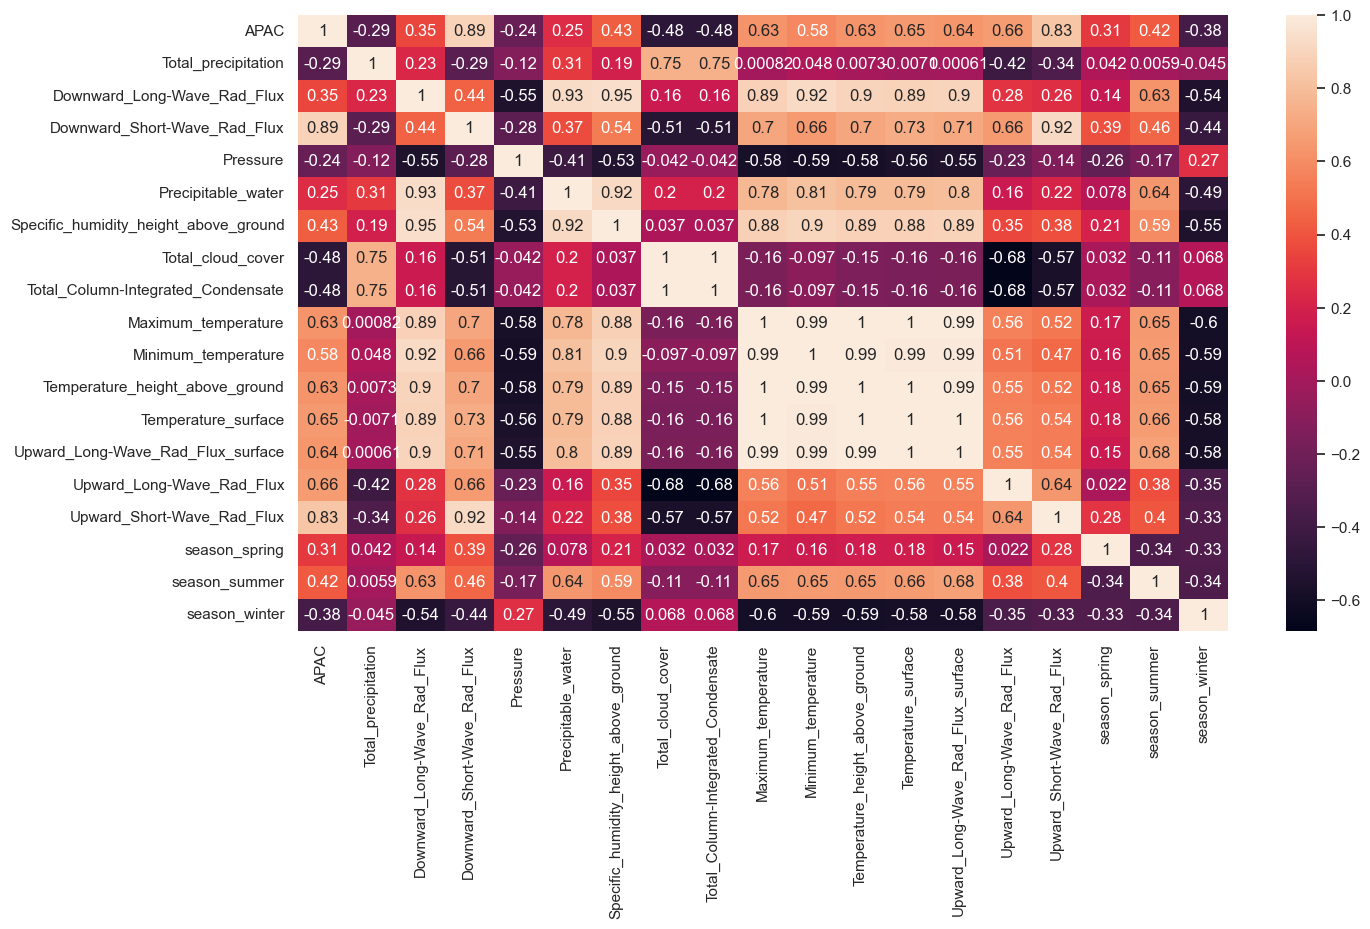

In [30]:
import seaborn as sns
df_corr = df_final.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_corr, annot=True)


Tras haber pensado en eliminar aquellas columnas que tienen una correlacion superior al 0.85 con otras, quedandose con aquellas que estén mas correlacionadas con el target. Es decir eliminando: Total_Column-Integrated_Condensate, Maximum_temperature, Minimum_temperature,Temperature_height_above_ground, Downward_Long-Wave_Rad_Flux, Upward_Short-Wave_Rad_Flux, Precipitable_water. 

Se demuestra que no mejora la predicción de nuestro modelo por eso se siguen considerando todas las variables

In [31]:
#df_final = df_final.drop(['Total_Column-Integrated_Condensate', 'Maximum_temperature', 'Minimum_temperature', 'Temperature_height_above_ground', 'Downward_Long-Wave_Rad_Flux', 'Upward_Short-Wave_Rad_Flux', 'Precipitable_water'], axis = 1)
#df_final

In [32]:
df_final = df_final.drop('DateTime', axis = 1)

In [33]:
df_final = df_final.set_index('Date')
df_final

,APAC,Total_precipitation,Downward_Long-Wave_Rad_Flux,Downward_Short-Wave_Rad_Flux,Pressure,Precipitable_water,Specific_humidity_height_above_ground,Total_cloud_cover,Total_Column-Integrated_Condensate,Maximum_temperature,Minimum_temperature,Temperature_height_above_ground,Temperature_surface,Upward_Long-Wave_Rad_Flux_surface,Upward_Long-Wave_Rad_Flux,Upward_Short-Wave_Rad_Flux,season_spring,season_summer,season_winter
Date,,,,,,,,,,,,,,,,,,,
1994/01/01,12301200,0.000000,258.641876,219.090912,102023.781250,8.086300,0.003322,0.001273,0.002298,284.397034,280.260590,282.354309,282.548523,364.319763,254.383820,47.745453,0,0,1
1994/01/02,11666400,0.031273,279.489685,166.909088,101307.500000,11.476502,0.003798,0.069091,0.069067,283.792694,279.787292,282.072571,282.332184,358.075287,231.387253,32.618183,0,0,1
1994/01/03,12782700,0.000000,227.046585,225.327271,101984.921875,6.755241,0.002511,0.000909,0.001782,277.425537,273.055878,275.724670,277.426300,335.168396,241.279846,49.072727,0,0,1
1994/01/04,12817500,0.000909,238.266357,226.218185,102571.125000,5.734901,0.002601,0.002727,0.003251,278.947357,275.171509,276.330963,277.474670,342.495178,244.669952,49.527271,0,0,1
1994/01/05,10379400,0.000000,258.618134,219.454544,100769.312500,9.284234,0.003136,0.024364,0.025482,283.421997,278.554871,282.822815,282.668030,353.977081,242.216919,46.636364,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007/12/27,1389300,0.002364,232.150177,212.727280,101556.656250,8.197086,0.003368,0.007091,0.008116,274.602570,271.489197,273.695740,274.657043,320.147217,239.142990,59.636364,0,0,1
2007/12/28,11312100,0.009273,226.880142,223.090912,102168.796875,6.018736,0.002995,0.017091,0.017351,273.369354,270.511871,271.988647,272.393768,313.229614,235.864929,90.436363,0,0,1
2007/12/29,9662400,0.000364,232.126923,209.818176,102100.625000,8.348250,0.002958,0.048727,0.049416,274.086090,269.556213,272.739716,272.605225,309.804169,223.783890,82.581818,0,0,1


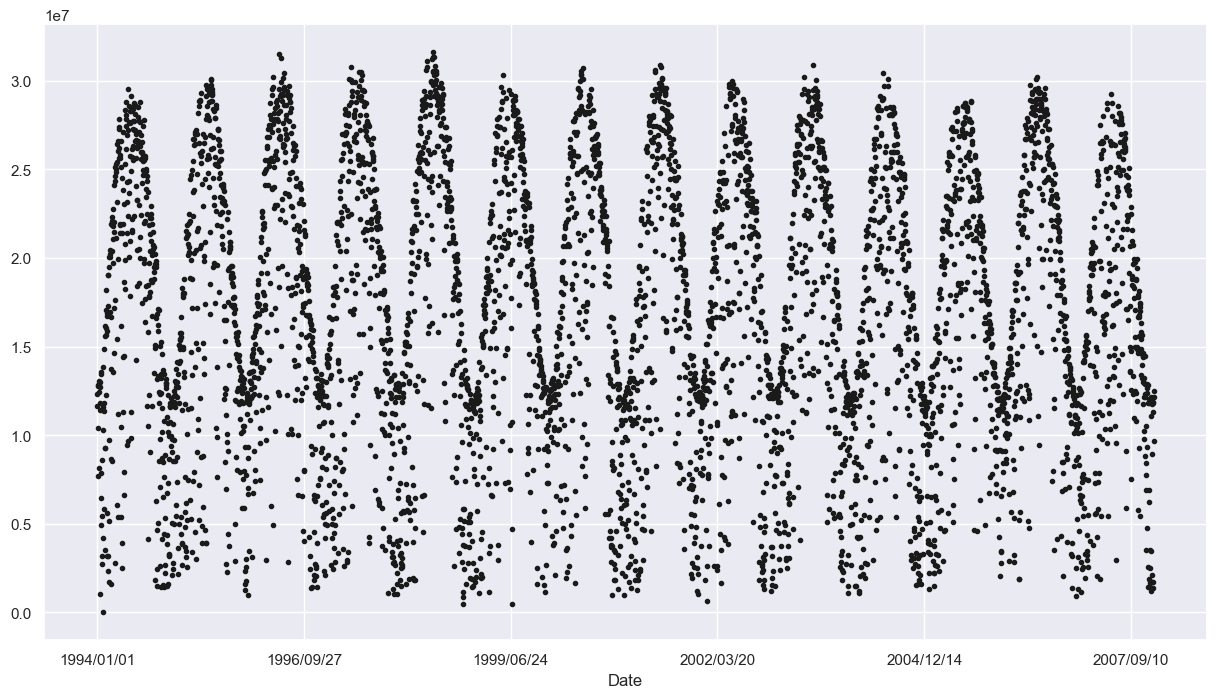

In [34]:
from matplotlib import pyplot
df_final.APAC.plot(style='k.')
pyplot.show()

Así quedaría nuestro target graficado en el tiempo, suscita que quizá una serie temporal sea lo que mejor predice nuestro target. Sin embargo al disponer de información acerca del tiempo se estudiaran ambas tipos de prediccion tanto la serie temporal como la regresión

### Division en train y test

In [35]:
import datetime 
df_train1 = df_final.loc['1994/01/01':'2003/12/31']
df_test = df_final.loc['2004/01/01':'2008/01/01']
df_train1.tail(10)

,APAC,Total_precipitation,Downward_Long-Wave_Rad_Flux,Downward_Short-Wave_Rad_Flux,Pressure,Precipitable_water,Specific_humidity_height_above_ground,Total_cloud_cover,Total_Column-Integrated_Condensate,Maximum_temperature,Minimum_temperature,Temperature_height_above_ground,Temperature_surface,Upward_Long-Wave_Rad_Flux_surface,Upward_Long-Wave_Rad_Flux,Upward_Short-Wave_Rad_Flux,season_spring,season_summer,season_winter
Date,,,,,,,,,,,,,,,,,,,
2003/12/22,4938600,0.033273,315.416351,149.745453,101158.687500,14.373715,0.005922,0.185273,0.184911,286.072906,284.073456,284.548492,285.406647,379.203522,211.832962,28.127274,0,0,1
2003/12/23,11786100,0.006545,248.599289,217.890915,102277.468750,7.442603,0.003256,0.000000,0.000573,281.639252,277.434967,279.657196,280.374634,352.775452,249.741013,48.690910,0,0,1
2003/12/24,11300100,0.000000,250.662720,218.000000,102021.929688,7.126299,0.003057,0.000182,0.000753,281.903015,277.749969,280.845886,280.892456,348.280426,254.098129,48.781818,0,0,1
2003/12/25,11358300,0.000000,256.353516,217.236359,101642.140625,8.674275,0.003282,0.006182,0.006633,283.216644,279.836853,282.202911,282.359955,357.643982,240.361603,47.454544,0,0,1
2003/12/26,5928900,0.185636,332.653503,107.090912,101618.914062,14.273065,0.007190,0.103273,0.102938,285.112122,282.565247,284.644257,284.806519,369.849396,245.379379,20.109091,0,0,1
2003/12/27,2696400,0.283091,328.506805,194.181824,101120.984375,14.437421,0.007154,0.048545,0.048651,290.096466,287.559875,288.775421,289.053711,399.097443,272.255005,41.381817,0,0,1
2003/12/28,9863700,0.000000,250.883789,199.272720,101765.437500,5.959205,0.001630,0.029091,0.028693,282.341248,278.633362,280.507416,281.108765,355.437347,242.905533,42.381817,0,0,1
2003/12/29,12121200,0.000000,230.693939,224.181824,102215.078125,4.660153,0.001884,0.000000,0.000622,280.066345,276.295013,278.769653,279.608002,345.193634,250.923904,50.163635,0,0,1
2003/12/30,11988600,0.000000,240.110077,225.454544,101955.882812,5.867505,0.001452,0.002727,0.003553,281.738220,278.133606,280.695496,280.779510,349.076385,245.131104,49.236362,0,0,1


#### Division del train en train y validacion

In [36]:
df_train = df_train1.loc['1994/01/01':'2000/12/31']
df_val = df_train1.loc['2001/01/01':'2003/12/31']
df_val.tail(10)

,APAC,Total_precipitation,Downward_Long-Wave_Rad_Flux,Downward_Short-Wave_Rad_Flux,Pressure,Precipitable_water,Specific_humidity_height_above_ground,Total_cloud_cover,Total_Column-Integrated_Condensate,Maximum_temperature,Minimum_temperature,Temperature_height_above_ground,Temperature_surface,Upward_Long-Wave_Rad_Flux_surface,Upward_Long-Wave_Rad_Flux,Upward_Short-Wave_Rad_Flux,season_spring,season_summer,season_winter
Date,,,,,,,,,,,,,,,,,,,
2003/12/22,4938600,0.033273,315.416351,149.745453,101158.687500,14.373715,0.005922,0.185273,0.184911,286.072906,284.073456,284.548492,285.406647,379.203522,211.832962,28.127274,0,0,1
2003/12/23,11786100,0.006545,248.599289,217.890915,102277.468750,7.442603,0.003256,0.000000,0.000573,281.639252,277.434967,279.657196,280.374634,352.775452,249.741013,48.690910,0,0,1
2003/12/24,11300100,0.000000,250.662720,218.000000,102021.929688,7.126299,0.003057,0.000182,0.000753,281.903015,277.749969,280.845886,280.892456,348.280426,254.098129,48.781818,0,0,1
2003/12/25,11358300,0.000000,256.353516,217.236359,101642.140625,8.674275,0.003282,0.006182,0.006633,283.216644,279.836853,282.202911,282.359955,357.643982,240.361603,47.454544,0,0,1
2003/12/26,5928900,0.185636,332.653503,107.090912,101618.914062,14.273065,0.007190,0.103273,0.102938,285.112122,282.565247,284.644257,284.806519,369.849396,245.379379,20.109091,0,0,1
2003/12/27,2696400,0.283091,328.506805,194.181824,101120.984375,14.437421,0.007154,0.048545,0.048651,290.096466,287.559875,288.775421,289.053711,399.097443,272.255005,41.381817,0,0,1
2003/12/28,9863700,0.000000,250.883789,199.272720,101765.437500,5.959205,0.001630,0.029091,0.028693,282.341248,278.633362,280.507416,281.108765,355.437347,242.905533,42.381817,0,0,1
2003/12/29,12121200,0.000000,230.693939,224.181824,102215.078125,4.660153,0.001884,0.000000,0.000622,280.066345,276.295013,278.769653,279.608002,345.193634,250.923904,50.163635,0,0,1
2003/12/30,11988600,0.000000,240.110077,225.454544,101955.882812,5.867505,0.001452,0.002727,0.003553,281.738220,278.133606,280.695496,280.779510,349.076385,245.131104,49.236362,0,0,1


## Entrenamiento de modelos

##### Separación de target y variables

In [37]:
X_train = df_train.drop('APAC', axis = 1)
y_train = df_train['APAC']
X_val = df_val.drop('APAC', axis = 1)
y_val = df_val['APAC']
X_train_all = df_train1.drop('APAC', axis = 1)
y_train_all = df_train1['APAC']

### Problema de regresion

In [38]:
#%pip install hypopt

In [39]:
from sklearn.model_selection import PredefinedSplit, GridSearchCV, RandomizedSearchCV
split_index = [-1]*len(X_train) + [0]*len(X_val)
X = np.concatenate((X_train, X_val), axis=0)
y = np.concatenate((y_train, y_val), axis=0)
pds = PredefinedSplit(test_fold = split_index)


In [40]:
y.shape

(3652,)

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

np.random.seed(42)


In [42]:
reg = Pipeline(steps = [
    ("scaler", MinMaxScaler()),
    ("reg", LinearRegression())])
ridge = Pipeline(steps = [
    ("scaler", MinMaxScaler()),
    ("ridge", Ridge())])
lasso = Pipeline(steps = [
    ("scaler", MinMaxScaler()),
    ("Lasso", Lasso())])
svr = Pipeline([
    ("scaler", MinMaxScaler()),
    ("selectkbest", SelectKBest()),
    ("svr", SVR())])

rand_forest = RandomForestRegressor()
xgb_reg = XGBRegressor(random_state=42)

knn_scal = Pipeline([
    ("scaler", MinMaxScaler()),
    ("knn", KNeighborsRegressor())
])

reg_param = {}

ridge_param = {'ridge__alpha': np.logspace(-3,3,10)}

lasso_param = {'Lasso__alpha': np.logspace(-3,3,10)}

svr_param = {
    "selectkbest__k": [1,2,3,4,5],
    "svr__C": np.arange(1, 100, 10),
    "svr__epsilon": np.arange(0.001, 1),
    "svr__kernel": ['linear', 'rbf', 'poly']
    }

rand_forest_param = {
    'n_estimators': [1350, 1375, 1400, 1425],
    'max_features': [4,5,6,7]
}

xgboost_params = {
        'min_child_weight': [8, 10, 12],
        'gamma': [1.5, 2, 2.5, 3, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.7, 0.8, 0.9],
        'max_depth': [2, 3, 4]
        }

knn_param_scal = {
    'knn__n_neighbors': [3,5,7]
}



gs_reg = GridSearchCV(reg,
reg_param,
cv=pds,
scoring = 'neg_mean_absolute_error',
n_jobs = -1,
verbose = 1)
gs_ridge = GridSearchCV(ridge,
ridge_param,
cv=pds,
scoring = 'neg_mean_absolute_error',
n_jobs = -1,
verbose = 1)
gs_lasso = GridSearchCV(lasso,
lasso_param,
cv=pds,
scoring = 'neg_mean_absolute_error',
n_jobs = -1,
verbose = 1)
gs_svr = RandomizedSearchCV(svr,
svr_param,
cv=pds,
scoring = 'neg_mean_absolute_error',
n_jobs = -1,
verbose = 1, 
random_state = 42)
gs_rand_forest = GridSearchCV(rand_forest,
rand_forest_param,
cv=pds,
scoring = 'neg_mean_absolute_error',
n_jobs = -1,
verbose = 1)

gs_xgb =  GridSearchCV(xgb_reg,
xgboost_params,
scoring='neg_mean_absolute_error',
n_jobs=4,
cv=pds,
verbose=3) 

gs_knn_scal = GridSearchCV(knn_scal,
knn_param_scal,
scoring='neg_mean_absolute_error',
cv=pds,
verbose=1,
n_jobs=-1)



grids = {
    "gs_reg": gs_reg,
    "gs_ridge": gs_ridge,
    "gs_lasso": gs_lasso,
    "gs_svr": gs_svr,
    "gs_rand_forest": gs_rand_forest,
    "gs_xgb": gs_xgb,
    "gs_knn_scal": gs_knn_scal
}

In [43]:
svr.get_params().keys()
for nombre, grid_search in grids.items():
    print(nombre)

gs_reg
gs_ridge
gs_lasso
gs_svr
gs_rand_forest
gs_xgb
gs_knn_scal


In [44]:
%%time 
for nombre, grid_search in grids.items():
    grid_search.fit(X, y)


Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 10 candidates, totalling 10 fits
Fitting 1 folds for each of 10 candidates, totalling 10 fits


c:\Users\MEMORY SISTEMAS\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.934e+16, tolerance: 2.340e+13
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Fitting 1 folds for each of 10 candidates, totalling 10 fits
Fitting 1 folds for each of 16 candidates, totalling 16 fits
Fitting 1 folds for each of 405 candidates, totalling 405 fits
Fitting 1 folds for each of 3 candidates, totalling 3 fits
Wall time: 3min 15s


In [45]:
mae_validation_dummy = np.mean(np.abs(y_val-y_train.mean()))

In [46]:
best_grids = [(i, j.best_score_) for i, j in grids.items()]

best_grids = pd.DataFrame(best_grids, columns = ["Grid", "Best score"])
best_grids['Raes'] = (best_grids['Best score'] * (-1))/mae_validation_dummy
best_grids.sort_values(by = "Best score", ascending = False)

,Grid,Best score,Raes
4,gs_rand_forest,-2.067529e+06,0.301524
5,gs_xgb,-2.078119e+06,0.303068
1,gs_ridge,-2.204143e+06,0.321447
0,gs_reg,-2.208009e+06,0.322011
2,gs_lasso,-2.216045e+06,0.323183
6,gs_knn_scal,-2.344089e+06,0.341857
3,gs_svr,-6.507757e+06,0.949076


El mejor modelo corresponde con random_forest, que dispone de uner error relativo absoluto menor.

In [47]:
print("Best estimator:", gs_rand_forest.best_estimator_)
print("Best params:", gs_rand_forest.best_params_)
print("Best score:", gs_rand_forest.best_score_)

Best estimator: RandomForestRegressor(max_features=4, n_estimators=1425)
Best params: {'max_features': 4, 'n_estimators': 1425}
Best score: -2067528.6704157656


#### Predicción con time series

In [116]:
# librerias
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

from pmdarima.arima import auto_arima
from pmdarima.arima import ARIMA

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [117]:
model = auto_arima(y_train,
                   start_p = 1,
                   start_q = 1,
                   max_p = 5,
                   max_q = 5,
                   max_d = 3,
                   trace = True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=86710.499, Time=0.64 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=88553.899, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=86769.904, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=87608.981, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=92975.786, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=86704.442, Time=1.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=86724.218, Time=0.25 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=86661.377, Time=1.01 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=86667.760, Time=0.38 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=86622.197, Time=0.97 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=86627.889, Time=0.52 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=86587.708, Time=1.71 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=86596.159, Time=0.83 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=5.84 sec
 ARIMA(4,0,2)(0,0,0)[0] i

In [119]:
print(y_val.shape)

(1095,)


In [118]:
print(model.aic())
predictions = model.predict(y_val.shape[0])
arima_mae = mean_absolute_error(y_val, predictions)
print("mean_absolute_error:", mean_absolute_error(y_val, predictions))
print("relative_absolute_error:", arima_mae/mae_validation_dummy)

86441.70471822214
mean_absolute_error: 6723216.569661402
relative_absolute_error: 0.9804981939527156


In [120]:
time_Serie = df_final[['APAC']].reset_index()
time_Serie['Date'] = pd.to_datetime(time_Serie['Date'])
time_Serie = time_Serie.set_index('Date')
time_Serie

,APAC
Date,
1994-01-01,12301200
1994-01-02,11666400
1994-01-03,12782700
1994-01-04,12817500
1994-01-05,10379400
...,...
2007-12-27,1389300
2007-12-28,11312100
2007-12-29,9662400


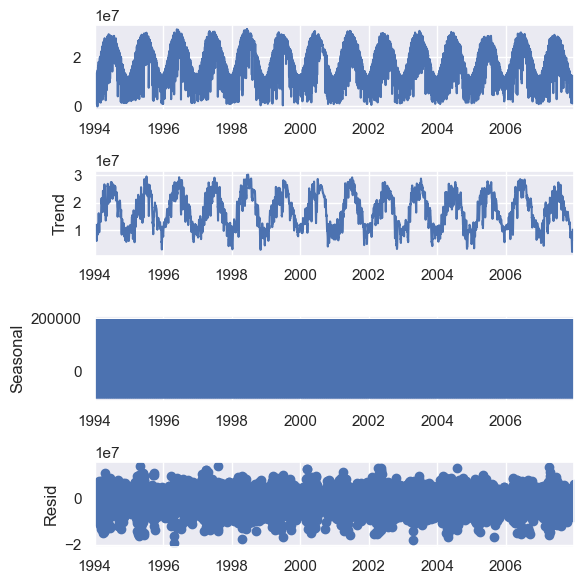

In [121]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_add = seasonal_decompose(time_Serie, model = "additive", extrapolate_trend = "freq")

plt.rcParams.update({'figure.figsize': (6,6)})
result_add.plot();

In [122]:
for i in range(12,0,-1):
    time_Serie["t-"+str(i)] = time_Serie["APAC"].shift(i)


time_Serie.dropna(inplace=True)
time_Serie.head(15)

,APAC,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
Date,,,,,,,,,,,,,
1994-01-13,12726900,12301200.0,11666400.0,12782700.0,12817500.0,10379400.0,7673100.0,12873000.0,13066500.0,12464700.0,8164800.0,12774600.0,11448000.0
1994-01-14,13026600,11666400.0,12782700.0,12817500.0,10379400.0,7673100.0,12873000.0,13066500.0,12464700.0,8164800.0,12774600.0,11448000.0,12726900.0
1994-01-15,11793300,12782700.0,12817500.0,10379400.0,7673100.0,12873000.0,13066500.0,12464700.0,8164800.0,12774600.0,11448000.0,12726900.0,13026600.0
1994-01-16,1058700,12817500.0,10379400.0,7673100.0,12873000.0,13066500.0,12464700.0,8164800.0,12774600.0,11448000.0,12726900.0,13026600.0,11793300.0
1994-01-17,13432800,10379400.0,7673100.0,12873000.0,13066500.0,12464700.0,8164800.0,12774600.0,11448000.0,12726900.0,13026600.0,11793300.0,1058700.0
1994-01-18,13586100,7673100.0,12873000.0,13066500.0,12464700.0,8164800.0,12774600.0,11448000.0,12726900.0,13026600.0,11793300.0,1058700.0,13432800.0
1994-01-19,7861800,12873000.0,13066500.0,12464700.0,8164800.0,12774600.0,11448000.0,12726900.0,13026600.0,11793300.0,1058700.0,13432800.0,13586100.0
1994-01-20,4926000,13066500.0,12464700.0,8164800.0,12774600.0,11448000.0,12726900.0,13026600.0,11793300.0,1058700.0,13432800.0,13586100.0,7861800.0
1994-01-21,6464100,12464700.0,8164800.0,12774600.0,11448000.0,12726900.0,13026600.0,11793300.0,1058700.0,13432800.0,13586100.0,7861800.0,4926000.0


In [123]:
X = time_Serie.iloc[:,1:]
y = time_Serie.iloc[:, 0]

X_train1 = X.loc['1994/01/01':'2003/12/31']
y_train1 = y.loc['1994/01/01':'2003/12/31']
X_test = X.loc['2001/01/01':'2003/12/31']
y_test = y.loc['2001/01/01':'2003/12/31']

X_train = X.loc['1994/01/01':'2000/12/31']
y_train = y.loc['1994/01/01':'2000/12/31']

X_val = X.loc['2001/01/01':'2003/12/31']
y_val = y.loc['2001/01/01':'2003/12/31']


print("Shape X_train:", X_train.shape)
print("Shape X_val", X_val.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_val:", y_val.shape)


Shape X_train: (2545, 12)
Shape X_val (1095, 12)
Shape y_train: (2545,)
Shape y_val: (1095,)


In [124]:
from sklearn.model_selection import PredefinedSplit, GridSearchCV, RandomizedSearchCV
split_index = [-1]*len(X_train) + [0]*len(X_val)
X = np.concatenate((X_train, X_val), axis=0)
y = np.concatenate((y_train, y_val), axis=0)
pds = PredefinedSplit(test_fold = split_index)

In [125]:
y.shape

(3640,)

In [126]:
reg = Pipeline(steps = [
    ("scaler", MinMaxScaler()),
    ("reg", LinearRegression())])
ridge = Pipeline(steps = [
    ("scaler", MinMaxScaler()),
    ("ridge", Ridge())])
lasso = Pipeline(steps = [
    ("scaler", MinMaxScaler()),
    ("Lasso", Lasso())])
svr = Pipeline([
    ("scaler", MinMaxScaler()),
    ("selectkbest", SelectKBest()),
    ("svr", SVR())])

rand_forest = RandomForestRegressor()
xgb_reg = XGBRegressor(random_state=42)

knn_scal = Pipeline([
    ("scaler", MinMaxScaler()),
    ("knn", KNeighborsRegressor())
])

reg_param = {}

ridge_param = {'ridge__alpha': np.logspace(-3,3,10)}

lasso_param = {'Lasso__alpha': np.logspace(-3,3,10)}

svr_param = {
    "selectkbest__k": [1,2,3,4,5,6],
    "svr__C": np.arange(1, 100, 10),
    "svr__epsilon": np.arange(0.001, 1),
    "svr__kernel": ['linear', 'rbf', 'poly']
    }

rand_forest_param = {
    'n_estimators': [1425, 1450, 1475, 1500],
    'max_features': [2,3,4,5,6]
}

xgboost_params = {
        'min_child_weight': [8, 10, 12],
        'gamma': [1.5, 2, 2.5, 3, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.7, 0.8, 0.9],
        'max_depth': [2, 3, 4]
        }

knn_param_scal = {
    'knn__n_neighbors': [3,5,7]
}



gs_reg_ts = GridSearchCV(reg,
reg_param,
cv=pds,
scoring = 'neg_mean_absolute_error',
n_jobs = -1,
verbose = 1)
gs_ridge_ts = GridSearchCV(ridge,
ridge_param,
cv=pds,
scoring = 'neg_mean_absolute_error',
n_jobs = -1,
verbose = 1)
gs_lasso_ts = GridSearchCV(lasso,
lasso_param,
cv=pds,
scoring = 'neg_mean_absolute_error',
n_jobs = -1,
verbose = 1)
gs_svr_ts = RandomizedSearchCV(svr,
svr_param,
cv=pds,
scoring = 'neg_mean_absolute_error',
n_jobs = -1,
verbose = 1, 
random_state = 42)
gs_rand_forest_ts = GridSearchCV(rand_forest,
rand_forest_param,
cv=pds,
scoring = 'neg_mean_absolute_error',
n_jobs = -1,
verbose = 1)

gs_xgb_ts =  GridSearchCV(xgb_reg,
xgboost_params,
scoring='neg_mean_absolute_error',
n_jobs=4,
cv=pds,
verbose=3) 

gs_knn_scal_ts = GridSearchCV(knn_scal,
knn_param_scal,
scoring='neg_mean_absolute_error',
cv=pds,
verbose=1,
n_jobs=-1)



grids_ts = {
    "gs_reg_ts": gs_reg_ts,
    "gs_ridge_ts": gs_ridge_ts,
    "gs_lasso_ts": gs_lasso_ts,
    "gs_svr_ts": gs_svr_ts,
    "gs_rand_forest_ts": gs_rand_forest_ts,
    "gs_xgb_ts": gs_xgb_ts,
    "gs_knn_scal_ts": gs_knn_scal_ts
}

In [127]:
%%time 
for nombre, grid_search in grids_ts.items():
    grid_search.fit(X, y)
    print(nombre)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
gs_reg_ts
Fitting 1 folds for each of 10 candidates, totalling 10 fits
gs_ridge_ts
Fitting 1 folds for each of 10 candidates, totalling 10 fits
gs_lasso_ts
Fitting 1 folds for each of 10 candidates, totalling 10 fits
gs_svr_ts
Fitting 1 folds for each of 20 candidates, totalling 20 fits
gs_rand_forest_ts
Fitting 1 folds for each of 405 candidates, totalling 405 fits
gs_xgb_ts
Fitting 1 folds for each of 3 candidates, totalling 3 fits
gs_knn_scal_ts
Wall time: 3min 36s


In [128]:
best_grids = [(i, j.best_score_) for i, j in grids_ts.items()]

best_grids = pd.DataFrame(best_grids, columns = ["Grid", "Best score"])
best_grids['Raes'] = (best_grids['Best score'] * (-1))/mae_validation_dummy
best_grids.sort_values(by = "Best score", ascending = False)

,Grid,Best score,Raes
0,gs_reg_ts,-4.123516e+06,0.601364
2,gs_lasso_ts,-4.123516e+06,0.601364
1,gs_ridge_ts,-4.123518e+06,0.601364
5,gs_xgb_ts,-4.181983e+06,0.609891
4,gs_rand_forest_ts,-4.185637e+06,0.610423
6,gs_knn_scal_ts,-4.376386e+06,0.638242
3,gs_svr_ts,-4.672180e+06,0.681380


## Modelo final y predicciones

random forest max_features = 5 n_estimators = 1400
X_train_all
y_train_all

In [50]:
X_test = df_test.drop('APAC', axis = 1)
y_test = df_test['APAC']

In [51]:
model = RandomForestRegressor(n_estimators= 1400, max_features=5, criterion= 'absolute_error')

model.fit(X_train_all, y_train_all)

RandomForestRegressor(criterion='absolute_error', max_features=5,
                      n_estimators=1400)

In [52]:
model

RandomForestRegressor(criterion='absolute_error', max_features=5,
                      n_estimators=1400)

In [53]:
import pickle

with open("rand_forest_model.model", "wb") as archivo_salida:
    pickle.dump(model, archivo_salida)


In [81]:
mae_validation_dummy_end = np.mean(np.abs(y_test-y_train_all.mean()))

In [82]:
y_pred = model.predict(X_test)
mae_end = mean_absolute_error(y_test, y_pred)
rae_end = mae_end/mae_validation_dummy_end
print(mae_end)
print(rae_end)

2089817.0566148432
0.32554704192550904


In [83]:
df_test.shape

(1461, 19)

In [84]:
X_test.shape

(1461, 18)

In [85]:
y_test.shape

(1461,)

In [86]:
y_pred.shape

(1461,)

In [93]:
fin = pd.DataFrame(y_test)
fin['pred'] = y_pred
fin2 = fin.reset_index()
fin2

,Date,APAC,pred
0,2004/01/01,4978800,4.834521e+06
1,2004/01/02,11146800,1.118370e+07
2,2004/01/03,11391900,1.191504e+07
3,2004/01/04,10670100,1.096170e+07
4,2004/01/05,12207300,1.225946e+07
...,...,...,...
1456,2007/12/27,1389300,9.730652e+06
1457,2007/12/28,11312100,1.022502e+07
1458,2007/12/29,9662400,8.977028e+06
1459,2007/12/30,12155400,1.277307e+07


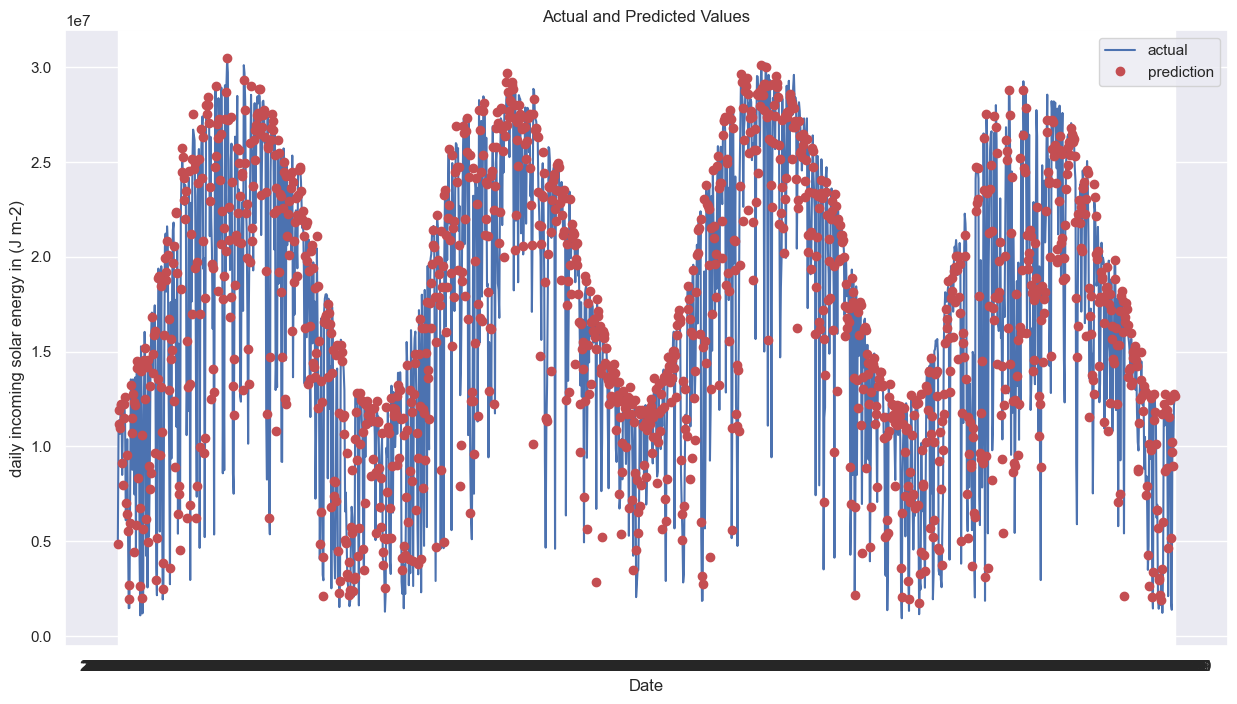

In [95]:
# Plot the actual values
plt.plot(fin2['Date'], fin2['APAC'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(fin2['Date'], fin2['pred'], 'ro', label = 'prediction')
plt.xticks(); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('daily incoming solar energy in (J m-2)'); plt.title('Actual and Predicted Values');

# El modelo dispone de un error relativo absoluto de 0.32, es decir el modelo mejora en un 68% al modelo trivial, predecir todo con la media del entrenamiento.